In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [3]:
df = df.rename(columns={'Lương': 'x1', 'Thời gian làm việc': 'x2', 'Cho vay': 'y'})
df.head()

,x1,x2,y
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [4]:
# sigmoid function
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

# Error funciton
'''
y: given labels
x: observations
w: parameters
'''
def err_func(Y, X, w):
    L = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))
    return L

Y = pd.DataFrame(df['y'])

X = df.drop(columns='y')
X['x0'] = pd.Series(np.ones(len(X)))
Y.shape

(20, 1)

In [5]:
class LogisticRegression:
    def __init__(self, step_size = 0.01, eps=1e-3):
        self.theta = None
        self.step_size = step_size
        self.eps = eps

    def transform(self,x, y):
        if x.ndim == 1:
            x = x.reshape(-1,1)

        one_col = np.ones((x.shape[0],1))
        self.X = np.hstack((one_col, x))
        self.Y = np.array(y).reshape(-1,1)

    def fit(self, X, y):
        self.transform(X, y)
        self.theta = np.zeros(self.X.shape[1]).reshape(-1, 1)

        for i in range(1000):
            y_pred = self.sigmoid()
            grad = np.dot(self.X.T , y_pred - self.Y)
            self.theta -= self.step_size * grad

    def sigmoid(self):
        z = np.dot(self.X, self.theta)
        return 1 / (1 + np.exp(-z))

    def get_theta(self):
        return self.theta

    def predict(self, x):
        if x.ndim == 1:
            x = x.reshape(-1,1)
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        z = self.theta @ x
        return 1 / (1 + np.exp(-z))

NameError: name 'model_theta' is not defined

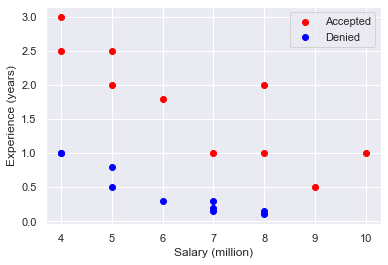

In [8]:
X_accept = df[df['y'] == 1]
X_denied = df[df['y'] == 0]


fig , ax = plt.subplots(1, 1)
ax.scatter(X_accept.iloc[:, 0], X_accept.iloc[:, 1], c= "red", label = "Accepted")
ax.scatter(X_denied.iloc[:, 0], X_denied.iloc[:, 1], c= "blue", label = "Denied")
ax.legend(loc= 1)
ax.set_xlabel('Salary (million)')
ax.set_ylabel('Experience (years)')

t = 0.5
ax.plot((4,10), (-(model_theta[0] + model_theta[1] * 4 + np.log(1/t-1)) / model_theta[2] , -(model_theta[0] + model_theta[1] * 10 + np.log(1/t-1) )/ model_theta[2]))

plt.show()